# Simple Linear Regression
    

### Liner Regression

Liner Regression is the simplest and most widely used statistical technique for 
predictive modeling. It basically gives us an equation, where we have our 
features as independent variables on which our target variable is dependent. 
<br /><br />

Equation for Linear regression :- 
\begin{eqnarray}
Y = β_{1}X_{1} + β_{2}X_{2} + ..... + β_{n}X_{n} 
\end{eqnarray}

<br><br>
or in simple terms we can say to fit a line to the data. 
<br><br>
For Example 

<img src='(1).png'></img>

<img src='download.png'></img>

### Today, We will create our Machine Learning Model

So let's dive in 
    

In [62]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)


### Generate some random data
\begin{eqnarray}
y = 5x + 4
\end{eqnarray}
<br>
We will be using above equation to generate data. It's a line equation in two dimension where x is independent variable and y is dependent variable with slope = 5 and intercept = 4 
<br>
<br>
Slope :- A slope of m means that every 1 - unit change in X yields a m-unit change in Y. 
<br>
<br>
Prediction :- If we know something about X, this can help in predicting something about Y. 

In [66]:
delta = np.random.uniform(-20,20, size=(100,))
x = np.arange(100)
y = 5*x + 4 + delta


In [67]:
# data = pd.read_excel('slr09.xls')
# x = data['X'].tolist()
# y = data['Y'].tolist()

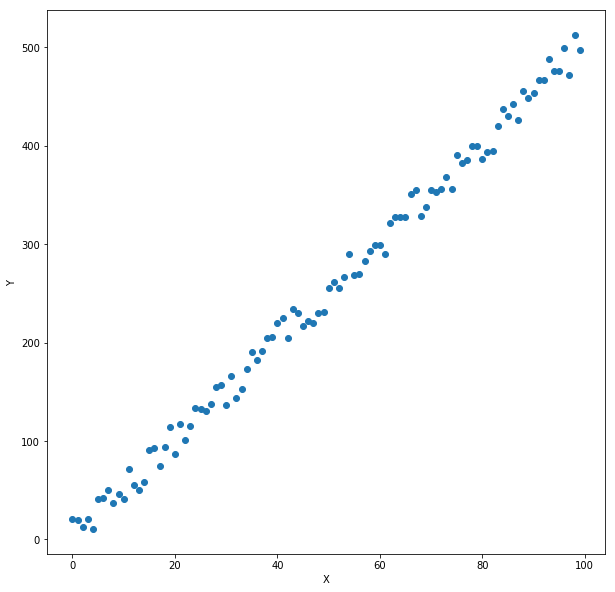

In [68]:
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')



In [73]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [74]:
y

array([  21.04180838,   20.18908748,   12.53039509,   20.96133005,
         10.468694  ,   41.28253218,   41.61620766,   50.3531968 ,
         36.54321618,   45.67567869,   41.41394275,   71.62559339,
         55.61125058,   50.02227715,   58.66586554,   90.81299795,
         92.96359606,   74.66264308,   93.49944484,  114.03242979,
         86.49030617,  117.05209683,  100.74801775,  114.79150727,
        133.75482946,  132.49485486,  130.57096346,  137.26283114,
        155.04827211,  157.24231766,  136.77018324,  166.46394126,
        144.11253733,  152.52620325,  173.14906368,  190.94213853,
        182.19898657,  191.38419989,  204.2239224 ,  206.13121456,
        219.72455802,  225.41156218,  204.80995817,  233.84368812,
        229.91472998,  216.61660105,  221.53215782,  220.27123692,
        229.65637762,  231.57624179,  255.29540212,  262.11639092,
        255.79569381,  266.69766328,  290.54396669,  269.20137251,
        270.071128  ,  282.51693521,  293.61043611,  299.08889

### So now we got the data what next ?? 
Now we have to predict value of m and c in equation 


\begin{eqnarray}
y = mx + c
\end{eqnarray}
<br />
m and c are known as model coefficients or parameters. 
<br />
<br />

<b>Goal -> </b> To obtain coefficient estimates of m and c such that linear model fits the data well. or in other words finding slope(m) and intercept (c) such that resulting line fits the available data well. 




### Loss function 
\begin{eqnarray}
Loss = 1/2 * ( \sum_{i = 1}^{n} (correct\_value(x_{i}) - predicted\_value(x_{i}))^2
\end{eqnarray}


In Every Machine Learning Algorithm our main goal is to reduce the Loss function. 
But how can we reduce this loss function. 
<br><br>
We will be using Gradient Descent Algorithm. (Will Explain in much detail later if time allows)

In [75]:
def error(c, m, X, Y):
    total_error = 0
    num_of_samples = len(X)
    for i in range(num_of_samples):
        error = (Y[i] - (m * x + c))**2
        total_error += error 
    return total_error/ num_of_samples

In [76]:
def step_gradient(c_updated, m_updated, X, Y, learning_rate):
    c_gradient = 0 
    m_gradient = 0
    num_of_samples = len(X)
    for i in range(num_of_samples):
        x = X[i]
        y = Y[i]
        c_gradient += -(2/num_of_samples) * (y - ((m_updated * x) + c_updated))
        m_gradient += -(2/num_of_samples) * x * (y - ((m_updated * x) + c_updated))
    new_c = c_updated - (learning_rate * c_gradient)
    new_m = m_updated - (learning_rate * m_gradient)
    return new_c, new_m

In [77]:
def perform_gradient_descent(X, Y, starting_c, starting_m, learning_rate, num_iter):
    c = starting_c
    m = starting_m
    for i in range(num_iter):
        c,m = step_gradient(c, m, X, Y, learning_rate)
    return c,m


In [78]:
learning_rate = 0.0002
initial_c = np.random.randint(1,10)
initial_m = np.random.randint(1,10)
num_iter = 1000
c, m = perform_gradient_descent(x, y, initial_c, initial_m, learning_rate, num_iter)

In [79]:
# Predicted c and m 

In [80]:
c  

4.8909955091225621

In [81]:
m

4.9787750744308621

In [82]:
get_y = lambda x: m*x + c 

In [83]:
y_predicted = get_y(np.array(x))

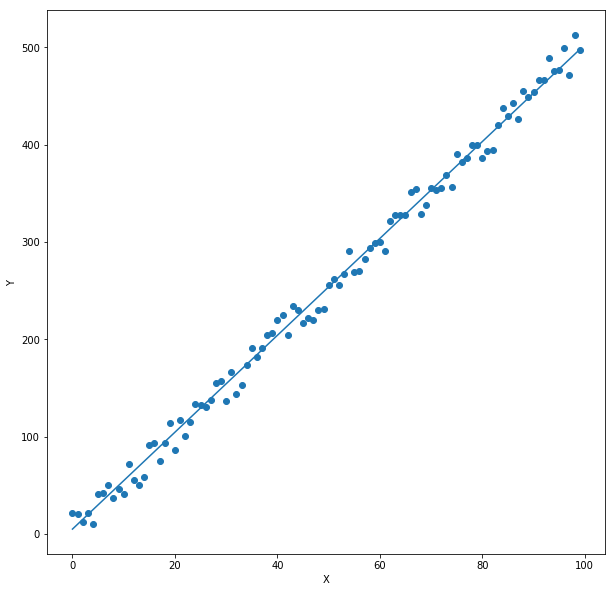

In [84]:
plt.scatter(x,y)
plt.plot(x, y_predicted)
plt.xlabel('X')
plt.ylabel('Y')